<a href="https://colab.research.google.com/github/vaishnavipatil29/PR-ML-Assignments/blob/main/PRML_Midsemester.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ques1.

Surface-1

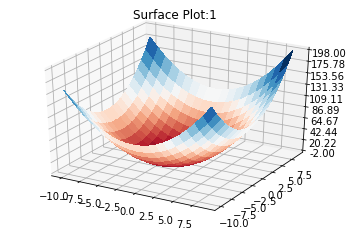

Minimum Value Obtained from Plot:  (-1, -1, -2)
Minimum Vaues Obtained from Grdient Descent :  -1.0000005093086262 -1.0000005093086262 -1.9999999999994813


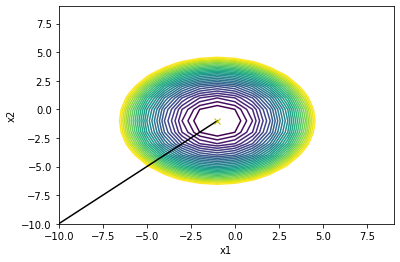

Alpha=0.01, Different Initialisations
  Sr.No.    Initialisation    Min. Value
--------  ----------------  ------------
       1          -10.0000       -1.0000
       2           -8.0000       -1.0000
       3           -6.0000       -1.0000
       4           -4.0000       -1.0000
       5           -2.0000       -1.0000
       6            0.0000       -1.0000
       7            2.0000       -1.0000
       8            4.0000       -1.0000
       9            6.0000       -1.0000
      10            8.0000       -1.0000
 Initialisations:-10, Different Alphas
  Sr.No.    Alpha    Min. Value
--------  -------  ------------
       1   0.0100       -1.0000
       2   0.0600       -1.0000
       3   0.1100       -1.0000
       4   0.1600       -1.0000
       5   0.2100       -1.0000
       6   0.2600       -1.0000
       7   0.3100       -1.0000
       8   0.3600       -1.0000
       9   0.4100       -1.0000
      10   0.4600       -1.0000
      11   0.5100       -1.0000
      12   0.56

In [ ]:
#------------------------------------------Plotting of Surface----------------------------------------------------------#

#libraries required
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np
from pylab import meshgrid

X1 = np.arange(-10,10,1)
X2 = np.arange(-10,10,1)
X,Y = meshgrid(X1, X2) # grid of point

Z = X**2 + Y**2 + 2*X + 2*Y # evaluation of the function on the grid

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.RdBu,linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.set_title("Surface Plot:1")
plt.show() 

#----------------------------------------Finding Minimum : Plot-------------------------------------------#
# calc index of min/max Z value
xmin, ymin = np.unravel_index(np.argmin(Z), Z.shape)
xmax, ymax = np.unravel_index(np.argmax(Z), Z.shape)

# min max points in 3D space (x,y,z)
mi = (X[xmin,ymin], Y[xmin,ymin], Z.min())
ma = (X[xmax, ymax], Y[xmax, ymax], Z.max())
print("Minimum Value Obtained from Plot: ",mi)

#----------------------------------------Finding Minimum : Gradient Descent-------------------------------------------#
from sympy import symbols, diff
x1_init=[-10]
x2_init=[-10]
alpha=0.01
eps=0.000001
while True :
    x1, x2 = symbols('x1 x2', real=True)
    expr=x1**2 + x2**2 + 2*x1 + 2*x2
    diff_x1 =str(diff( expr, x1))
    x1=x1_init[-1]
    err_x1=eval(diff_x1)
    diff_x2 = str(diff( expr, x2))
    x2=x2_init[-1]
    err_x2=eval(diff_x2)
    x1_init.append(x1_init[-1] - alpha*err_x1)
    x2_init.append(x2_init[-1] - alpha*err_x2)
    if((abs(round(err_x1,7)) <= eps) and (abs(round(err_x2,7)) <= eps)) : break


print("Minimum Vaues Obtained from Grdient Descent : ",x1_init[-1],x2_init[-1],x1_init[-1]**2 + x2_init[-1]**2 + 2*x1_init[-1] + 2*x2_init[-1])

plt.contour(X,Y,Z,levels=[i for i in np.arange(0,30,1)])
plt.xlabel("x1")
plt.ylabel("x2")
plt.plot(np.asarray(x2_init),np.asarray(x1_init),'black')
plt.plot(x2_init[-1],x1_init[-1],'yx')
plt.show()

#--------------------------------------------Tabulating Results---------------------------#
from sympy import symbols, diff
x0 = np.arange(-10,10,2)
lr =  np.arange(0.01,0.8,0.05) 
eps=0.000001 
x0_min=[]
alpha=0.01
#for alpha in lr:
for x_init in x0:
    x1_init=[x_init]
    x2_init=[x_init]
    while True :
        x1=x1_init[-1]
        err_x1=2*x1+2
        x2=x2_init[-1]
        err_x2=2*x2+2
        x1_init.append(x1_init[-1] - alpha*err_x1)
        x2_init.append(x2_init[-1] - alpha*err_x2)
        if((abs(round(err_x1,7)) <= eps) and (abs(round(err_x2,7)) <= eps)) : break
    x0_min.append(x1_init[-1])
print("Alpha=0.01, Different Initialisations")
from tabulate import tabulate
headers = ['Sr.No.', 'Initialisation', 'Min. Value']    
srno = range(1, len(x0)+1)
table = zip(srno, x0, x0_min)
print(tabulate(table, headers=headers, floatfmt=".4f"))


lr =  np.arange(0.01,0.8,0.05) 
eps=0.000001 
lr_min=[]
x1_init=[-10]
x2_init=[-10]
for alpha in lr:
    while True :
        x1=x1_init[-1]
        err_x1=2*x1+2
        x2=x2_init[-1]
        err_x2=2*x2+2
        x1_init.append(x1_init[-1] - alpha*err_x1)
        x2_init.append(x2_init[-1] - alpha*err_x2)
        if((abs(round(err_x1,7)) <= eps) and (abs(round(err_x2,7)) <= eps)) : break
    lr_min.append(x1_init[-1])
print(" Initialisations:-10, Different Alphas")
from tabulate import tabulate
headers = ['Sr.No.', 'Alpha', 'Min. Value']    
srno = range(1, len(lr)+1)
table = zip(srno, lr, lr_min)
print(tabulate(table, headers=headers, floatfmt=".4f"))
      

In [ ]:
# Normal Equations Method: Normal Equations are the equations obtained by setting equal to zero to partial derivativesof the cost/error function.
import numpy as np

x1=np.arange(start=-10, stop=10, step=1)
x2=np.arange(start=-10, stop=10, step=1)

df_x1=2*x1+2
df_x2=2*x2+2
#set them 0 and find value of x1 and x2 there
index_1 = np.where(df_x1 ==0)
x1_min=z=x1[index_1][0]
index_2=np.where(df_x2 ==0)
x2_min=z=x2[index_2][0]
print("Minimum values By Normanl Equation: " ,x1_min,x2_min,x1_min**2 + x2_min**2 + 2*x1_min + 2*x2_min)

Minimum values By Normanl Equation:  -1 -1 -2


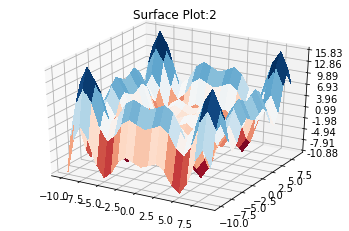

Minimum Value Obtained from Plot:  (-10, -10, -10.880422217787395)
Minimum Vaues Obtained from Grdient Descent :  -8.739969090726176e-09 -8.739969090726176e-09


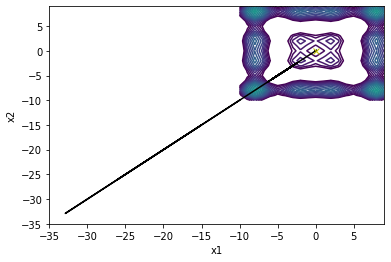

Alpha=0.01, Different Initialisations
  Sr.No.    Initialisation    Min. Value
--------  ----------------  ------------
       1          -10.0000      -11.0855
       2           -8.0000      -11.0855
       3           -6.0000       -4.9132
       4           -4.0000       -4.9132
       5           -2.0000       -0.0000
       6            0.0000        0.0000
       7            2.0000        0.0000
       8            4.0000        4.9132
       9            6.0000        4.9132
      10            8.0000       11.0855
 Initialisations:-10, Different Alphas
  Sr.No.    Alpha    Min. Value
--------  -------  ------------
       1   0.0100      -11.0855
       2   0.0600      -11.0855
       3   0.1100      -11.0855
       4   0.1600      -11.0855
       5   0.2100      -11.0855
       6   0.2600      -11.0855
       7   0.3100      -11.0855
       8   0.3600      -11.0855
       9   0.4100      -11.0855
      10   0.4600      -11.0855
      11   0.5100       -5.7213
      12   0.56

In [ ]:
#------------------------------------------Plotting of Surface----------------------------------------------------------#

#libraries required
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np
from pylab import meshgrid

X1 = np.arange(-10,10,1)
X2 = np.arange(-10,10,1)
X,Y = meshgrid(X1, X2) # grid of point

Z = X*np.sin(X) + Y*np.sin(Y) # evaluation of the function on the grid

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.RdBu,linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.set_title("Surface Plot:2")
plt.show() 

#----------------------------------------Finding Minimum : Plot-------------------------------------------#
# calc index of min/max Z value
xmin, ymin = np.unravel_index(np.argmin(Z), Z.shape)
xmax, ymax = np.unravel_index(np.argmax(Z), Z.shape)

# min max points in 3D space (x,y,z)
mi = (X[xmin,ymin], Y[xmin,ymin], Z.min())
ma = (X[xmax, ymax], Y[xmax, ymax], Z.max())
print("Minimum Value Obtained from Plot: ",mi)

#----------------------------------------Finding Minimum : Gradient Descent-------------------------------------------#
from sympy import symbols, diff
import math 
x1_init=[-10]
x2_init=[-10]
alpha=0.71
eps=0.000001
while True:
    x1 = x1_init[-1]
    err_x1 = x1*math.cos(x1) + math.sin(x1)
    x2=x2_init[-1]
    err_x2 = x2*math.cos(x2) + math.sin(x2)
    x1_init.append(x1_init[-1] - alpha*err_x1)
    x2_init.append(x2_init[-1] - alpha*err_x2)
    if((abs(round(err_x1,7)) <= 0) and (abs(round(err_x2,7)) <= 0)) : break


print("Minimum Vaues Obtained from Grdient Descent : ",x1_init[-1],x2_init[-1])



plt.contour(X,Y,Z,levels=[i for i in np.arange(0,30,1)])
plt.xlabel("x1")
plt.ylabel("x2")
plt.plot(np.asarray(x2_init),np.asarray(x1_init),'black')
plt.plot(x2_init[-1],x1_init[-1],'yx')
plt.show()


#--------------------------------------------Tabulating Results---------------------------#
from sympy import symbols, diff
x0 = np.arange(-10,10,2)
lr =  np.arange(0.01,0.8,0.05) 
eps=0.000001 
x0_min=[]
alpha=0.01
#for alpha in lr:
for x_init in x0:
    x1_init=[x_init]
    x2_init=[x_init]
    while True :
        x1 = x1_init[-1]
        err_x1 = x1*math.cos(x1) + math.sin(x1)
        x2=x2_init[-1]
        err_x2 = x2*math.cos(x2) + math.sin(x2)
        x1_init.append(x1_init[-1] - alpha*err_x1)
        x2_init.append(x2_init[-1] - alpha*err_x2)
        if((abs(round(err_x1,7)) <= eps) and (abs(round(err_x2,7)) <= eps)) : break
    x0_min.append(x1_init[-1])
print("Alpha=0.01, Different Initialisations")
from tabulate import tabulate
headers = ['Sr.No.', 'Initialisation', 'Min. Value']    
srno = range(1, len(x0)+1)
table = zip(srno, x0, x0_min)
print(tabulate(table, headers=headers, floatfmt=".4f"))


lr =  np.arange(0.01,0.8,0.05) 
eps=0.000001 
lr_min=[]
x1_init=[-10]
x2_init=[-10]
for alpha in lr:
    for i in range(0,100000):
        x1 = x1_init[-1]
        err_x1 = x1*math.cos(x1) + math.sin(x1)
        x2=x2_init[-1]
        err_x2 = x2*math.cos(x2) + math.sin(x2)
        x1_init.append(x1_init[-1] - alpha*err_x1)
        x2_init.append(x2_init[-1] - alpha*err_x2)
        #if((abs(round(err_x1,7)) <= eps) and (abs(round(err_x2,7)) <= eps)) : break
    lr_min.append(x1_init[-1])
print(" Initialisations:-10, Different Alphas")
from tabulate import tabulate
headers = ['Sr.No.', 'Alpha', 'Min. Value']    
srno = range(1, len(lr)+1)
table = zip(srno, lr, lr_min)
print(tabulate(table, headers=headers, floatfmt=".4f"))

In [ ]:
# Normal Equations Method: Normal Equations are the equations obtained by setting equal to zero to partial derivatives of the cost/error function.
import numpy as np
import math
x1=np.arange(start=-10, stop=10, step=0.1)
x2=np.arange(start=-10, stop=10, step=0.1)
sinx1=[]
for i in range(len(x1)):
    sinx1.append(math.sin(x1[i]))
sinx1 = np.array(sinx1)
sinx2=[]
for i in range(len(x2)):
    sinx2.append(math.sin(x2[i]))
sinx2 = np.array(sinx2)
cosx1=[]
for i in range(len(x1)):
    cosx1.append(math.cos(x1[i]))
cosx1 = np.array(cosx1)
cosx2=[]
for i in range(len(x1)):
    cosx2.append(math.cos(x2[i]))
cosx2 = np.array(cosx2)
df_x1=np.multiply(x1,cosx1) + sinx1
df_x2=np.multiply(x2,cosx2) + sinx2
#set them 0 and find value of x1 and x2 there
index_1 = np.where(df_x1 <10**-6)
x1_min=x1[index_1]
index_2=np.where(df_x2 <10**-6)
x2_min=x2[index_2]
print("Minimum values By Normanl Equation: ")
x1_min

Minimum values By Normanl Equation: 


array([-7.90000000e+00, -7.80000000e+00, -7.70000000e+00, -7.60000000e+00,
       -7.50000000e+00, -7.40000000e+00, -7.30000000e+00, -7.20000000e+00,
       -7.10000000e+00, -7.00000000e+00, -6.90000000e+00, -6.80000000e+00,
       -6.70000000e+00, -6.60000000e+00, -6.50000000e+00, -6.40000000e+00,
       -6.30000000e+00, -6.20000000e+00, -6.10000000e+00, -6.00000000e+00,
       -5.90000000e+00, -5.80000000e+00, -5.70000000e+00, -5.60000000e+00,
       -5.50000000e+00, -5.40000000e+00, -5.30000000e+00, -5.20000000e+00,
       -5.10000000e+00, -5.00000000e+00, -2.00000000e+00, -1.90000000e+00,
       -1.80000000e+00, -1.70000000e+00, -1.60000000e+00, -1.50000000e+00,
       -1.40000000e+00, -1.30000000e+00, -1.20000000e+00, -1.10000000e+00,
       -1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
       -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
       -2.00000000e-01, -1.00000000e-01, -3.55271368e-14,  2.10000000e+00,
        2.20000000e+00,  

Q1.b

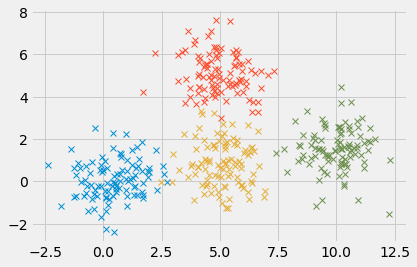

{0: [1.1079043952563525, 3.224393837064259], 1: [0.8940681747519701, 3.5116654476275295], 2: [4.837756643127608, 1.6704631774158742], 3: [8.722709990724418, 1.1105079272376592]}


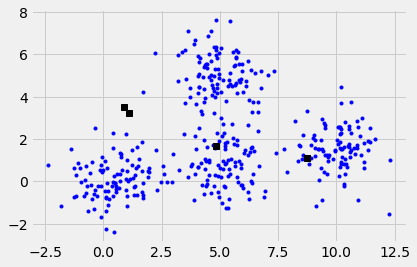

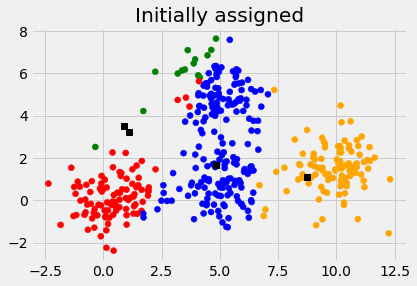

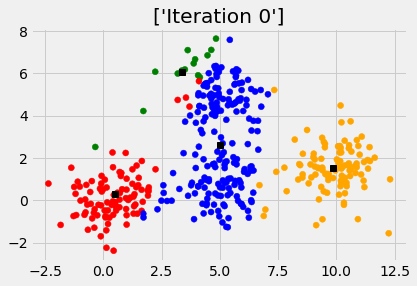

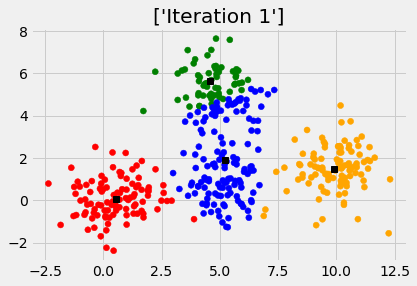

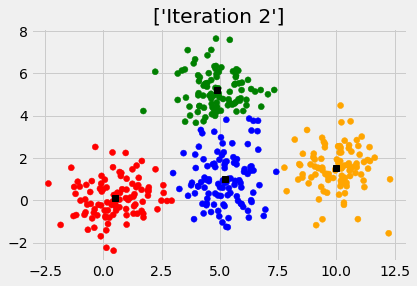

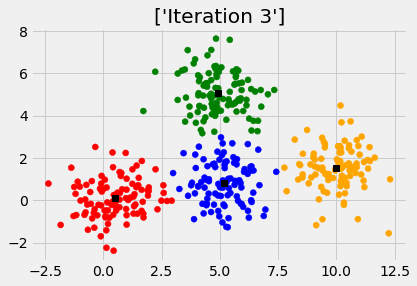

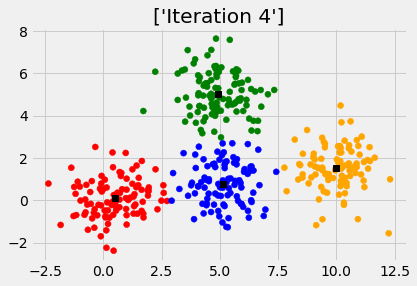

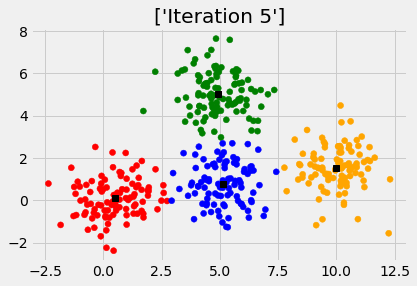

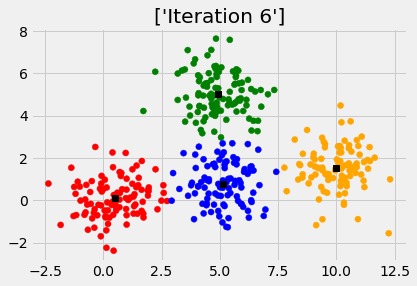

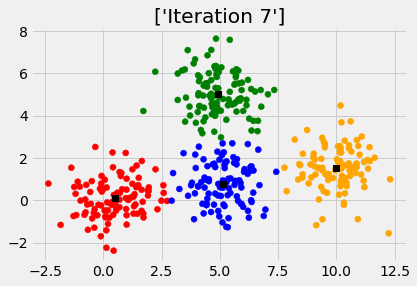

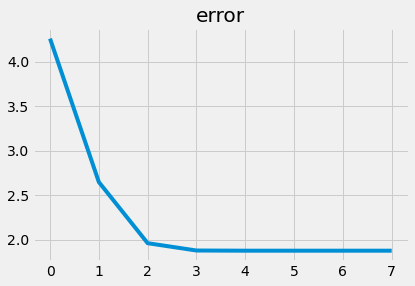

In [ ]:
#Convergence in Kmeans

#mean and covariance
mean = [[0.5, 0], [5, 5], [5, 1], [10, 1.5]]
cov = [[1, 0], [0, 1]]

#storing points in a dataframe
x1 = np.empty(400)
y1 = np.empty(400)
p=0

## Data generation
for i in range(0,4):
    x, y = np.random.multivariate_normal(mean[i], cov, 100).T
    plt.plot(x, y, 'x') 
    for j in range(p,p+100):
        x1[j]=x[j-p]
        y1[j]=y[j-p]
    p=p+100
       
plt.show()

#Generated points in a dataset
df = pd.DataFrame()
df['x']=x1
df['y']=y1

# randomly initialize clusters
k=4

#assign clusters randomly
centroids= dict()
np.random.seed(5)
centroids={i:[np.random.uniform(-2, 12),np.random.uniform(-2, 4)] for i in range(k)}
#centroids={i+1:[random.randint(-2, 12),random.randint(-2, 8)] for i in range(k)}
centroids2=np.array(list(centroids.values() )) 
print(centroids)

#plot the clusters in data
plt.plot(df['x'], df['y'], '.',color='blue')
for i in range(0,4):
    plt.plot(*centroids[i],'s',color='black')
plt.show()

colmap = {0: 'red', 1: 'green', 2: 'blue', 3: 'orange'}
import numpy.matlib

def assign_centroid(df,centroids):
    for i in range(0,4):
        #Find distance of each point from each cluster
        df[i]=np.sqrt( ((df['x']-centroids[i][0])**2) + ((df['y']-centroids[i][1])**2) )
    
    df2=df[df.columns[2:6]]
    df['closest']=df2.idxmin(axis=1)
    df['color']=df['closest'].map(lambda x:colmap[x])
    return df

###update centroid position : Mean of assigned points
def update(centroids,df):
    for i in range(0,4):
        centroids[i][0]=np.mean(df[df['closest']==i]['x'])
        centroids[i][1]=np.mean(df[df['closest']==i]['y'])
    return centroids

def error(centroids,df):
    a=[((df[df['closest']==i]['x']-centroids[i][0])**2) + ((df[df['closest']==i]['y']-centroids[i][1])**2) for i in range(0,4)]
    tot=0
    for j in range(0,4):
        tot=tot+sum(a[j])
    error=1/400 * tot
    return error
    
error_list=[]

for g in range(0,8):
    df=assign_centroid(df,centroids)
    if(g==0):       
        plt.scatter(df['x'],df['y'],color=df['color'])
        for i in range(0,4):
            plt.plot(*centroids[i],'s',color='black')
        plt.title("Initially assigned")
        plt.show()

    ### update
    centroids=update(centroids,df)
    plt.scatter(df['x'],df['y'],color=df['color'])
    for i in range(0,4):
        plt.plot(*centroids[i],'s',color='black')
    plt.title(['Iteration {}'.format(g)])
    plt.show()
    err=error(centroids,df)
    error_list.append(err)
    df = pd.DataFrame()
    df['x']=x1
    df['y']=y1
xo=[]
for i in range(0,8):
    xo.append(i)
plt.plot(xo,error_list) 
plt.title("error")
plt.show()

Thus, we can see that the cost function/error has been converged. thus, K-means converges to local minimum.

Convergence in Linear Regression

[1.07807808]


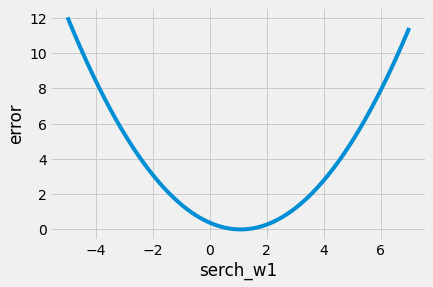

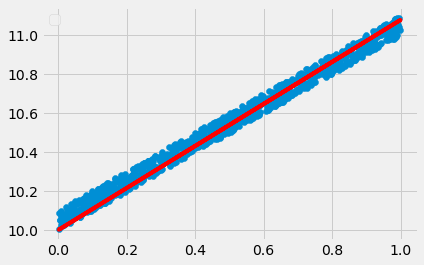

1.076873692643626


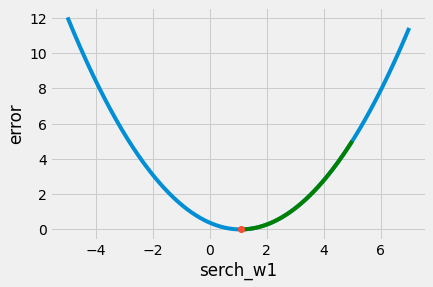

Therefore As discussed in the wriiten section, The Cost function reaches global minima for convex function


In [ ]:
# write your code here
import numpy as np
import matplotlib.pyplot as plt
x=np.random.rand(1000)
w0=10
w1=1
y=(w1*x) + w0 

rand_samples=np.random.uniform(0,1,1000)
ycor=y+(0.1*rand_samples)

def error(ycor,ypred):
    e=0
    for j in range(1000):
        e=e+(ycor[j]-ypred[j])**2
    return e/1000
     

w0=10
err=np.zeros(1000)
#search space for w1
t=np.linspace(-5,7,1000)
for i in range(1000):
    w1=t[i]
    ypred=(w1*x)+w0
    err[i]= error(ycor,ypred)
least_err_index=np.where(err == np.amin(err))   # index of the least error
print(t[least_err_index])   #print the ypredbest: w1
ybest=((t[least_err_index])*x)+w0
#plt error vs srch_w1
plt.plot(t,err)
plt.ylabel('error')
plt.xlabel('serch_w1')
plt.show()
#plot scatter plot (x,ycor)
plt.scatter(x,ycor)
plt.plot(x,ybest,'r')
plt.legend(loc='best')
plt.show()

import random
w0=10
w1=5
lambdaa = 0.1
y_pred=w1*x + w0
error2=(1/1000)*sum((ycor-y_pred)**2)
delta_err=(-2/1000)*sum((ycor-y_pred)*x)
w1_old=w1
w1_search=[]
err_search=[]
w1_new=0
while(delta_err> 1e-10):
    w1_search.append(w1_old)
    err_search.append(error2)
    w1_new=w1_old - (lambdaa*delta_err)
    y_pred=w1_new*x + w0
    error2=(1/1000)*sum((ycor-y_pred)**2)
    delta_err=(-2/1000)*sum((ycor-y_pred)*x)
    w1_old=w1_new
   
    
print(w1_new)   

plt.plot(t,err)
plt.ylabel('error')
plt.xlabel('serch_w1')
plt.plot(w1_search,err_search, color='green')
plt.plot(w1_new,error2, marker="o")
plt.show()
print("Therefore As discussed in the wriiten section, The Cost function reaches global minima for convex function")

Ques2

Data Preprocessing

In [ ]:
import pandas as pd
df=pd.read_csv('creditcard.csv')
#------------------------------------------Obtain_balanced dataset-----------------------------------------------------#
shuffled_df = df.sample(frac=1,random_state=4)
# Put all the fraud class in a separate dataset.
fraud_df = shuffled_df.loc[shuffled_df['Class'] == 1]
#Randomly select 492 observations from the non-fraud (majority class)
non_fraud_df = shuffled_df.loc[shuffled_df['Class'] == 0].sample(n=492,random_state=42)
# Concatenate both dataframes again
df = pd.concat([fraud_df, non_fraud_df])
df['Class'].value_counts()
#-------------------------------------------------Removing Outliers---------------------------------------------------#
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 2.5 * IQR)) |(df > (Q3 + 2.5 * IQR))).any(axis=1)]
df.reset_index(drop=True, inplace=True)
#------------------------------------------------Normalization and Standardisation--------------------------------------#
from sklearn import preprocessing
# Get column names first
names = df.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=names)
scaled_df['Class']=df['Class']
scaled_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.066711,-1.013009,1.882041,-1.685911,2.525982,-1.082661,-0.443658,-1.976312,2.532400,-2.031852,...,1.134653,-0.064239,0.631413,-0.737947,-0.021837,1.183213,0.987949,-0.541930,-0.640723,1
1,-1.609417,0.802554,0.051625,0.478557,0.753210,0.382805,0.177740,0.456332,-0.485581,1.094607,...,-1.254721,-1.559348,-0.096731,-0.538919,0.899441,-0.245082,-0.382011,-0.082081,-0.601257,1
2,1.312582,-0.164272,2.652209,-2.665527,2.568953,0.350697,-1.284304,-1.214131,1.469597,-2.647962,...,0.784484,-0.665651,0.056832,-1.996865,-0.075504,1.163122,1.192550,0.300399,-0.643976,1
3,-0.795487,-4.046955,1.025480,-2.508803,1.660561,-1.963967,-1.077879,-4.481605,0.208921,-2.093577,...,-0.611759,0.858783,-1.688487,-0.836130,-0.617532,-0.392780,2.983130,1.555438,-0.643128,1
4,-1.807187,-0.773834,1.604232,-1.168267,0.472232,-0.922619,-1.144756,-1.537019,1.576908,-0.346961,...,0.717556,-0.798471,-0.160996,-0.693623,0.156073,0.699952,0.366344,0.331816,-0.640723,1


Q1.T-SNE Plot

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 699 samples in 0.006s...
[t-SNE] Computed neighbors for 699 samples in 0.091s...
[t-SNE] Computed conditional probabilities for sample 699 / 699
[t-SNE] Mean sigma: 1.754996
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.436378
[t-SNE] KL divergence after 1000 iterations: 0.993320


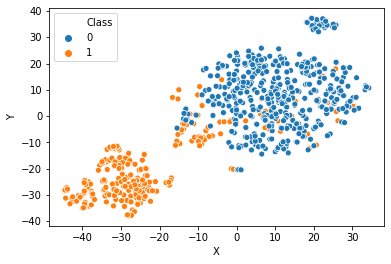

In [ ]:
from sklearn.manifold import TSNE
tsne_em = TSNE(n_components=2, perplexity=30.0, n_iter=1000, verbose=1).fit_transform(scaled_df)
tsne_em
tsne_df = pd.DataFrame({'X':tsne_em[:,0],
                        'Y':tsne_em[:,1],
                        'Class':scaled_df['Class']})

import seaborn as sns
sns.scatterplot(x="X", y="Y",
              data=tsne_df,hue="Class");


Q2. Selection Of Apt Algorithm

K-Means Clustering

{0: [-11.12027315641042, 19.65858449419011], 1: [-11.731233786422944, 23.48887263503373]}


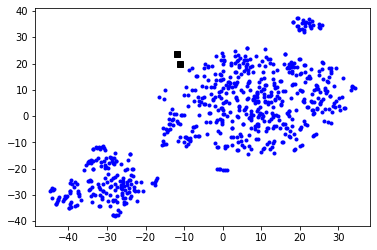

In [ ]:
#balanced Data
import numpy as np
import matplotlib.pyplot as plt
# randomly initialize clusters
k=2

#assign clusters randomly
centroids= dict()
np.random.seed(5)
centroids={i:[np.random.uniform(-20, 20),np.random.uniform(-50, 30)] for i in range(k)}
#centroids={i+1:[random.randint(-2, 12),random.randint(-2, 8)] for i in range(k)}
centroids2=np.array(list(centroids.values() )) 
print(centroids)
data_k=tsne_df.copy()
#plot the clusters in data
plt.plot(data_k['X'], data_k['Y'], '.',color='blue')
for i in range(0,k):
    plt.plot(*centroids[i],'s',color='black')
plt.show()

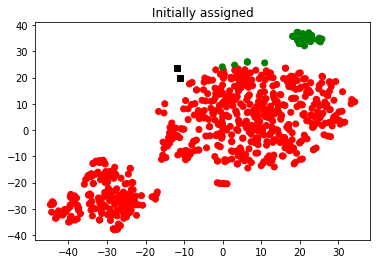

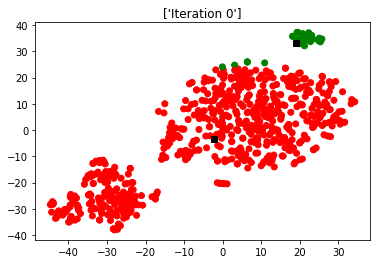

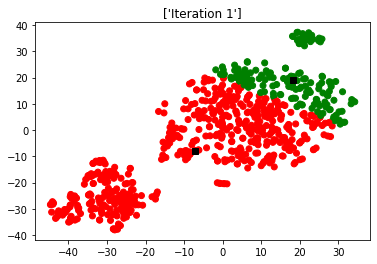

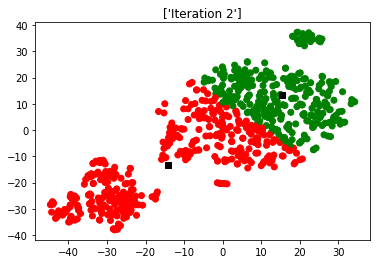

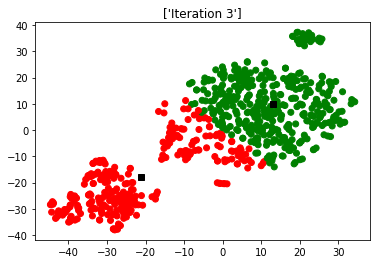

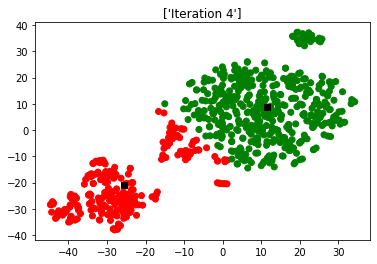

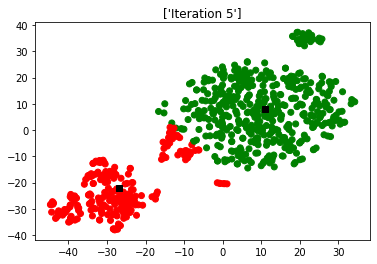

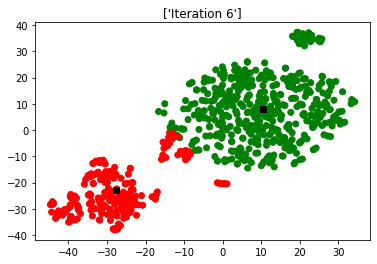

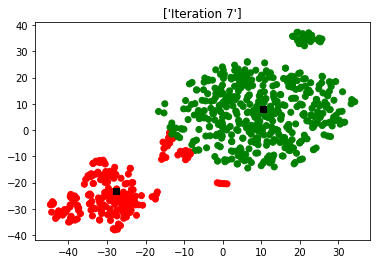

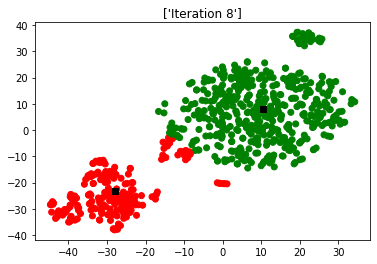

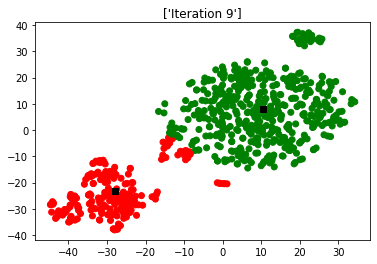

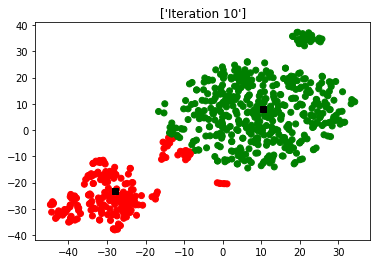

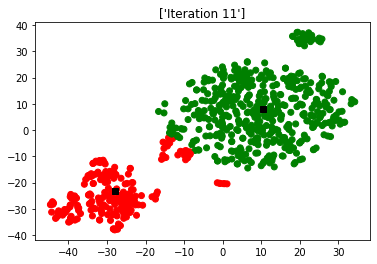

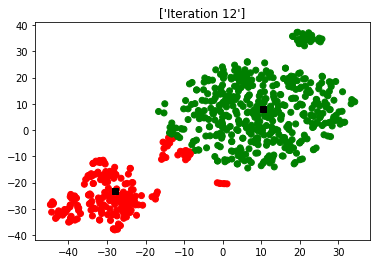

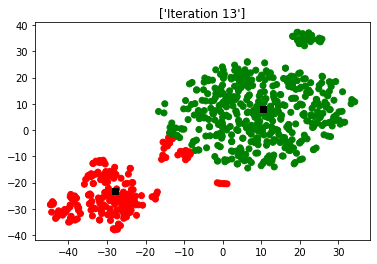

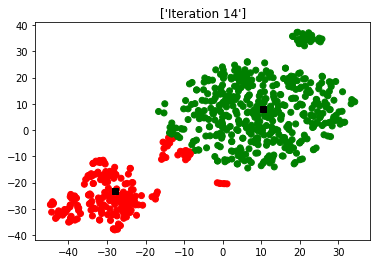

In [ ]:
colmap = {0: 'red', 1: 'green'}
import numpy.matlib

def assign_centroid(df,centroids):
    for i in range(0,2):
        #Find distance of each point from each cluster
        df[i]=np.sqrt( ((df['X']-centroids[i][0])**2) + ((df['Y']-centroids[i][1])**2) )
    
    df2=df[df.columns[3:5]]
    df['closest']=df2.idxmin(axis=1)
    df['color']=df['closest'].map(lambda x:colmap[x])
    return df

###update centroid position : Mean of assigned points
def update(centroids,df):
    for i in range(0,2):
        centroids[i][0]=np.mean(df[df['closest']==i]['X'])
        centroids[i][1]=np.mean(df[df['closest']==i]['Y'])
    return centroids

for g in range(0,15):
    df=assign_centroid(data_k,centroids)
    if(g==0):       
        plt.scatter(df['X'],df['Y'],color=df['color'])
        for i in range(0,2):
            plt.plot(*centroids[i],'s',color='black')
        plt.title("Initially assigned")
        plt.show()

    ### update
    centroids=update(centroids,df)
    plt.scatter(data_k['X'],data_k['Y'],color=df['color'])
    for i in range(0,2):
        plt.plot(*centroids[i],'s',color='black')
    plt.title(['Iteration {}'.format(g)])
    plt.show()
    

In [ ]:
data_k
comparison_column = np.where(data_k["Class"] == data_k["closest"], 1, 0)
Number_of_correct_predictions1=list(comparison_column).count(1)
Number_of_correct_predictions1

49

GMM

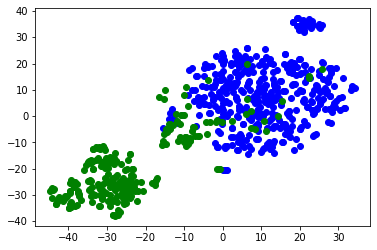

In [ ]:
data=tsne_df
# training gaussian mixture model 
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4)
gmm.fit(data)

#predictions from gmm
labels = gmm.predict(data)
frame = pd.DataFrame(data)
frame['cluster'] = labels
#frame.columns = ['Weight', 'Height', 'cluster']

color=['blue','green']
for k in range(0,2):
    data = frame[frame["cluster"]==k]
    plt.scatter(data["X"],data["Y"],c=color[k])
plt.show()

In [ ]:
frame['Class']=tsne_df['Class']
comparison_column = np.where(frame["Class"] == frame["cluster"], 1, 0)
Number_of_correct_predictions2=list(comparison_column).count(1)
Number_of_correct_predictions2

692

In [ ]:
#getting back tsne
tsne_df=tsne_df.iloc[:,0:3]
tsne_df

,X,Y,Class
0,-35.501518,-18.791725,1
1,-7.597025,-4.332727,1
2,-34.594799,-17.122875,1
3,-38.295368,-34.256668,1
4,-34.154152,-24.759275,1
...,...,...,...
694,6.441587,12.620607,0
695,13.087358,19.948801,0
696,33.633247,11.113392,0
697,11.800757,4.731824,0


Agglomerative hierarchical clustering

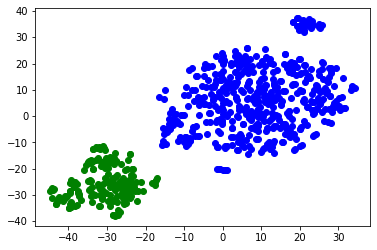

In [ ]:
data=tsne_df.iloc[:,0:2]
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
labels=cluster.fit_predict(data)

frame2 = pd.DataFrame(data)
frame2['cluster'] = labels
#frame.columns = ['Weight', 'Height', 'cluster']

color=['blue','green']
for k in range(0,2):
    data = frame2[frame2["cluster"]==k]
    plt.scatter(data["X"],data["Y"],c=color[k])
plt.show()


In [ ]:
frame2['Class']=tsne_df['Class']
comparison_column = np.where(frame2["Class"] == frame2["cluster"], 1, 0)
Number_of_correct_predictions3=list(comparison_column).count(1)
Number_of_correct_predictions3

626

DBSCAN

In [ ]:
tsne_df
data=tsne_df.iloc[:,0:2]
X = data.values
X

array([[-35.50152  , -18.791725 ],
       [ -7.5970254,  -4.3327274],
       [-34.5948   , -17.122875 ],
       ...,
       [ 33.633247 ,  11.113392 ],
       [ 11.800757 ,   4.7318244],
       [ 21.20859  ,  32.080826 ]], dtype=float32)

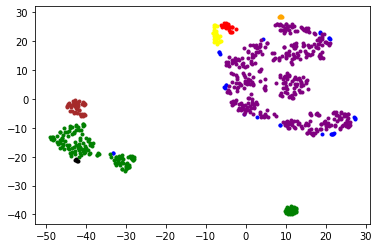

In [ ]:
import queue
#DBscan
data=tsne_df.iloc[:,0:2]
X = data.values
NOISE = 0
UNASSIGNED = 0
core=-1
edge=-2
def neighbor_points(data, pointId, radius):
    points = []
    for i in range(len(data)):
        if np.linalg.norm(data[i] - data[pointId]) <= radius:
            points.append(i)
    return points

def dbscan(data, Eps, MinPt):
    pointlabel  = [UNASSIGNED] * len(data)
    pointcount = []
    corepoint=[]
    noncore=[]
    
    for i in range(len(data)):
        pointcount.append(neighbor_points(data,i,Eps))
    
    for i in range(len(pointcount)):
        if (len(pointcount[i])>=MinPt):
            pointlabel[i]=core
            corepoint.append(i)
        else:
            noncore.append(i)

    for i in noncore:
        for j in pointcount[i]:
            if j in corepoint:
                pointlabel[i]=edge

                break
            
  
    cl = 1
    for i in range(len(pointlabel)):
        q = queue.Queue()
        if (pointlabel[i] == core):
            pointlabel[i] = cl
            for x in pointcount[i]:
                if(pointlabel[x]==core):
                    q.put(x)
                    pointlabel[x]=cl
                elif(pointlabel[x]==edge):
                    pointlabel[x]=cl
            #Stop when all point in Queue has been checked   
            while not q.empty():
                neighbors = pointcount[q.get()]
                for y in neighbors:
                    if (pointlabel[y]==core):
                        pointlabel[y]=cl
                        q.put(y)
                    if (pointlabel[y]==edge):
                        pointlabel[y]=cl            
            cl=cl+1 #move to next cluster
           
    return pointlabel,cl
    

def plotRes(data, clusterRes, clusterNum):
    nPoints = len(data)
    data_vis = TSNE(n_components=2).fit_transform(data)
    scatterColors = ['black', 'green', 'brown', 'red', 'purple', 'orange', 'yellow']
    for i in range(clusterNum):
        if (i==0):
            #Plot all noise point as blue
            color='blue'
        else:
            color = scatterColors[i % len(scatterColors)]
        x1 = [];  y1 = []
        for j in range(nPoints):
            if clusterRes[j] == i:
                x1.append(data_vis[j, 0])
                y1.append(data_vis[j, 1])
        plt.scatter(x1, y1, c=color, alpha=1, marker='.')
eps=3
minpts=6
pointlabel,cl = dbscan(X,eps,minpts)
plotRes(X, pointlabel, cl)
plt.show()

In [ ]:
tsne_df['Class']
comparison_column = np.where(tsne_df['Class'] == pointlabel, 1, 0)
Number_of_correct_predictions4=list(comparison_column).count(1)
Number_of_correct_predictions4

156

Total Correctly predicted data in all methods

In [ ]:
#699:Total Values
print("K-Means Clustering : ",(Number_of_correct_predictions1/699)*100,"%")
print("GMM : ",(Number_of_correct_predictions2/699)*100,'%')
print("Agglomerative hierarchical clustering : ",(Number_of_correct_predictions3/699)*100,"%")
print("DBSCAN : ",(Number_of_correct_predictions4/699)*100,"%")

K-Means Clustering :  7.0100143061516444 %
GMM :  98.99856938483548 %
Agglomerative hierarchical clustering :  89.55650929899856 %
DBSCAN :  22.317596566523605 %


Thus, GMM is the best suited

Q3. Peorform All Clustering Techniques

**1**. K-Means

In [ ]:
# Take imbalanced Data
import pandas as pd
df=pd.read_csv('creditcard.csv')
#-------------------------------------------------Removing Outliers---------------------------------------------------#
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 2.5 * IQR)) |(df > (Q3 + 2.5 * IQR))).any(axis=1)]
df.reset_index(drop=True, inplace=True)
#------------------------------------------------Normalization and Standardisation--------------------------------------#
from sklearn import preprocessing
# Get column names first
names = df.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=names)
scaled_df['Class']=df['Class']
scaled_df.dropna()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.679073,-1.583005,-0.334120,1.854850,0.923336,-0.150426,0.659420,0.533014,0.068550,-0.012016,0.429591,-1.050333,0.109119,-1.223752,-0.940845,1.525138,-0.670299,-0.031079,0.179106,0.607897,1.349608,0.313320,0.681537,-0.387100,0.154906,-0.042500,-0.417751,0.760272,-0.623356,2.484522,0.0
1,-1.679073,0.860307,0.135921,-0.915748,0.201171,0.366387,0.031725,0.021435,0.026063,-0.545881,0.063128,0.974641,1.353513,0.004847,-0.753138,0.633808,0.534255,-0.504887,-0.090013,-0.120744,-0.203154,-0.618804,-0.923848,0.876962,-0.578663,0.056639,0.193936,-0.285050,-0.166718,-0.727999,0.0
2,-1.678987,-1.206180,-0.490062,0.985800,-0.817193,0.275144,1.563736,0.529817,0.939572,-1.521509,0.222387,-0.746153,0.697683,0.020333,-0.914779,-0.722509,-1.429976,-1.340555,2.675315,-1.561176,-0.876374,-0.091008,0.204106,-0.863725,-2.085798,1.289000,-0.481469,0.240803,0.429758,1.913426,0.0
3,-1.678901,-1.389990,0.984087,0.700218,0.166134,-0.239782,0.237153,1.100733,-1.085250,0.379367,1.371137,-1.304112,0.963834,0.715837,-1.847439,0.140903,-0.645866,-0.684309,0.096775,1.137362,2.110887,0.353199,1.593157,-0.548175,0.288967,-0.901060,0.924828,1.389951,2.391430,0.743468,0.0
4,-1.678901,-0.688817,1.098897,0.223685,-0.277481,0.834716,0.092372,0.913166,0.573581,-0.815951,-0.227509,0.720655,0.832002,-0.698201,-0.745694,0.507550,0.454076,-0.421698,0.234258,0.028475,0.543204,-0.540081,-0.785737,0.114773,-0.635613,-0.969797,0.155140,1.642384,0.680209,-0.706572,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19032,1.234148,-1.062932,0.400695,0.790176,0.923858,1.127142,-0.263937,0.577661,0.062346,-1.271507,0.468627,0.365989,0.678843,-0.683589,0.171021,1.130873,-0.580559,-0.481121,1.306179,2.588736,1.916176,1.199035,0.744877,-1.162328,0.067492,0.708742,-0.129170,0.258296,0.702975,-0.126512,0.0
19033,1.234234,0.927452,-0.684254,-1.277682,-1.005230,0.084970,0.134337,-0.267238,0.295396,0.839684,-0.962811,0.044093,1.046382,-1.475296,0.084210,0.625816,-0.928863,-0.552341,0.333185,1.514532,-0.902093,-0.433681,-0.438397,-0.291956,-1.487322,1.214712,-1.491705,0.228970,-0.375401,-0.764950,0.0
19034,1.234321,0.903594,0.199640,-0.885990,0.238917,0.120143,-0.508992,0.136544,-0.392613,-0.532921,0.129451,0.751829,1.261056,-0.037538,-0.769503,0.372819,0.917445,-0.910336,0.500899,0.357867,-0.079594,-0.750619,-1.135360,0.706755,-0.030642,0.239963,0.137553,-0.408168,-0.127821,-0.747677,0.0
19035,1.234321,0.911473,-1.057646,-0.787731,-0.595927,-0.905885,-0.870741,-0.368813,-0.918746,-1.194118,1.110800,-0.208195,0.451726,0.101625,-0.714767,0.846275,0.691182,0.635053,-2.421678,0.092105,1.001487,1.758399,1.484524,-0.341886,0.849793,0.936771,-0.273695,-0.196230,-0.075768,0.760085,0.0


In [ ]:
#Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
df=scaled_df.copy()
df=df.dropna()
x = df.iloc[:, 0:30].values
kmeans5 = KMeans(n_clusters=2)
y_kmeans5 = kmeans5.fit_predict(x)
#print(y_kmeans5)

final=pd.DataFrame()
final['Class']=df['Class']
final['Predicted']=y_kmeans5 
#Number of correct predicted
comparison_column = np.where(final['Class'] == final['Predicted'], 1, 0)
Number_of_correct_predictions1=list(comparison_column).count(1)
print(final)
print("Number_of_correct_predictions : ",((Number_of_correct_predictions1)/19037)*100,"%")


       Class  Predicted
0        0.0          0
1        0.0          0
2        0.0          0
3        0.0          0
4        0.0          0
...      ...        ...
19032    0.0          0
19033    0.0          0
19034    0.0          0
19035    0.0          0
19036    0.0          0

[19037 rows x 2 columns]
Number_of_correct_predictions :  60.40867783789463 %


GMM

In [ ]:
data=scaled_df.copy()
data=data.dropna()
x=data.iloc[:, 0:30].values
# training gaussian mixture model 
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2)
gmm.fit(x)

#predictions from gmm
labels = gmm.predict(x)

final=pd.DataFrame()
final['Class']=data['Class']
final['Predicted']=labels
#Number of correct predicted
comparison_column = np.where(final['Class'] == final['Predicted'], 1, 0)
Number_of_correct_predictions2=list(comparison_column).count(1)
print(final)
print("Number_of_correct_predictions : ",((Number_of_correct_predictions2)/19037)*100,"%")

       Class  Predicted
0        0.0          0
1        0.0          0
2        0.0          0
3        0.0          0
4        0.0          0
...      ...        ...
19032    0.0          0
19033    0.0          0
19034    0.0          0
19035    0.0          0
19036    0.0          0

[19037 rows x 2 columns]
Number_of_correct_predictions :  60.40867783789463 %


agglomerative hierarchical clustering

In [ ]:
data=(scaled_df.dropna().iloc[:,0:30])
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
labels=cluster.fit_predict(data)

frame2 = pd.DataFrame(data)
frame2['cluster'] = labels

#Number of correct predicted
comparison_column = np.where(scaled_df.dropna()['Class'] == frame2['cluster'], 1, 0)
Number_of_correct_predictions3=list(comparison_column).count(1)
print(final)
print("Number_of_correct_predictions : ",((Number_of_correct_predictions3)/19037)*100,"%")




       Class  Predicted
0        0.0          0
1        0.0          0
2        0.0          0
3        0.0          0
4        0.0          0
...      ...        ...
19032    0.0          0
19033    0.0          0
19034    0.0          0
19035    0.0          0
19036    0.0          0

[19037 rows x 2 columns]
Number_of_correct_predictions :  66.89604454483374 %


DBSCAN

In [ ]:
import queue
#DBscan
data=(scaled_df.dropna().iloc[:,0:30])
X = data.values
NOISE = 0
UNASSIGNED = 0
core=-1
edge=-2
def neighbor_points(data, pointId, radius):
    points = []
    for i in range(len(data)):
        if np.linalg.norm(data[i] - data[pointId]) <= radius:
            points.append(i)
    return points

def dbscan(data, Eps, MinPt):
    pointlabel  = [UNASSIGNED] * len(data)
    pointcount = []
    corepoint=[]
    noncore=[]
    
    for i in range(len(data)):
        pointcount.append(neighbor_points(data,i,Eps))
    
    for i in range(len(pointcount)):
        if (len(pointcount[i])>=MinPt):
            pointlabel[i]=core
            corepoint.append(i)
        else:
            noncore.append(i)

    for i in noncore:
        for j in pointcount[i]:
            if j in corepoint:
                pointlabel[i]=edge

                break
            
  
    cl = 1
    for i in range(len(pointlabel)):
        q = queue.Queue()
        if (pointlabel[i] == core):
            pointlabel[i] = cl
            for x in pointcount[i]:
                if(pointlabel[x]==core):
                    q.put(x)
                    pointlabel[x]=cl
                elif(pointlabel[x]==edge):
                    pointlabel[x]=cl
            #Stop when all point in Queue has been checked   
            while not q.empty():
                neighbors = pointcount[q.get()]
                for y in neighbors:
                    if (pointlabel[y]==core):
                        pointlabel[y]=cl
                        q.put(y)
                    if (pointlabel[y]==edge):
                        pointlabel[y]=cl            
            cl=cl+1 #move to next cluster
           
    return pointlabel,cl
    

eps=3
minpts=6
pointlabel,cl = dbscan(X,eps,minpts)


comparison_column = np.where(scaled_df.dropna()['Class'] == pointlabel, 1, 0)
Number_of_correct_predictions4=list(comparison_column).count(1)
Number_of_correct_predictions4


Q2. 4 th

In [ ]:
import pandas as pd
df=pd.read_csv('creditcard.csv')
# Seperate through class
df1 = df[df['Class'] == 0]
df2 = df[df['Class'] == 1]

from sklearn.model_selection import train_test_split
train1, test1 = train_test_split(df1, test_size=0.1)
train2, test2 = train_test_split(df2, test_size=0.1)
train1.reset_index(drop=True, inplace=True)
train2.reset_index(drop=True, inplace=True)
test1.reset_index(drop=True, inplace=True)
test2.reset_index(drop=True, inplace=True)


train = pd.concat([train1, train2], axis=0)
test = pd.concat([test1, test2], axis=0)

In [ ]:
def euclidean(a,b):
    return np.linalg.norm(a-b)
x=train.iloc[:,0:30].values
import copy
import numpy as np

#Initialise clusters
k=2

#Initialise the centroids
centroid=x[np.random.choice(x.shape[0], k,replace=False)]

total=x.shape
dist_1=np.zeros(total[0])  #Distance of all points from cluster : k=0
dist_2=np.zeros(total[0])  #Distance of all points from cluster : k=1
belongs_to=np.zeros(total[0])  #Cluster to which the row belongs to
c_old=np.zeros(centroid.shape) #for storing old centroids
mean=np.zeros(centroid.shape) #to store mean f all points in a cluster
error=euclidean(centroid,c_old) #to check if the centroids have not changed, so that the loop can terminated

for m in range(0,15):
    for i in range(0,total[0]):
        #For all the points(rows) in the dataset, calculated the distance between the centroid
        dist_1[i] = euclidean(x[i],centroid[0])
        dist_2[i] = euclidean(x[i],centroid[1])
        if (dist_1[i]>dist_2[i]):
            belongs_to[i]=0
        else:
            belongs_to[i]=1
    c_old=copy.deepcopy(centroid)
    #Calculate means of all points of a particular cluster
    for i in range(len(belongs_to)):
        if belongs_to[i]==0:
            mean[0][0]=np.mean(x[i][0])
            mean[0][1]=np.mean(x[i][1])
        else:
            continue
    #Thus, mean[0] will be the new centroid for cluster 0
    for i in range(len(belongs_to)):
        if belongs_to[i]==1:
            mean[1][0]=np.mean(x[i][0])
            mean[1][1]=np.mean(x[i][1])
        else:
            continue

    centroid[0]=mean[0]
    centroid[1]=mean[1]
    error=euclidean(centroid,c_old)
    if error==0:
        print(belongs_to)




In [ ]:
final=pd.DataFrame()
final['Actual']=train['Class']
final['Predicted']=belongs_to
final

,Actual,Predicted
0,0,0.0
1,0,1.0
2,0,0.0
3,0,1.0
4,0,0.0
...,...,...
437,1,1.0
438,1,1.0
439,1,0.0
440,1,1.0


In [ ]:
#Performance
comparison_column = np.where(final['Actual'] == final['Predicted'], 1, 0)
Number_of_correct_predictions=list(comparison_column).count(1)
print("Correctly Predicted Classes: ", ((Number_of_correct_predictions)/256325)*100)

Correctly Predicted Classes:  49.74544035891934
